In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline

In [42]:
df = pd.read_csv('INC500_EU_Summary.csv')

#### Remove the empty Space before a column name

In [43]:
df.columns = df.columns.str.replace(' ','')

In [44]:
df.columns

Index(['url', 'rank', 'city', 'growth', 'company', 'country', 'revenue',
       'industry', 'yrs_on_list'],
      dtype='object')

In [45]:
df.drop(['url','rank'],axis=1, inplace = True)

In [46]:
df.head(2)

,city,growth,company,country,revenue,industry,yrs_on_list
0,London,14367.7003,Sumup Payments Limited,United Kingdom,55990000,IT Services,1
1,Helsinki,13600.7855,Restel Fast Food Oy,Finland,30278736,Travel & Hospitality,1


#### Replacing Long name and wrong typing name

In [47]:
df.country = df.country.replace({'Belgum':'Belgium','Russian Federation':'Russia',
                                 'The former Yugoslav Republic of Macedonia':'Macedonia','United Kingdom':'UK'})

In [48]:
df.head(2)

,city,growth,company,country,revenue,industry,yrs_on_list
0,London,14367.7003,Sumup Payments Limited,UK,55990000,IT Services,1
1,Helsinki,13600.7855,Restel Fast Food Oy,Finland,30278736,Travel & Hospitality,1


### What industry has the greater revenue?

In [49]:
a = 'city'
b = 'growth'
ind_rev = df.groupby(a)[b].sum().sort_values(ascending = True).tail(10) 
# use tail cuz I want the plot to be from highest to lowest

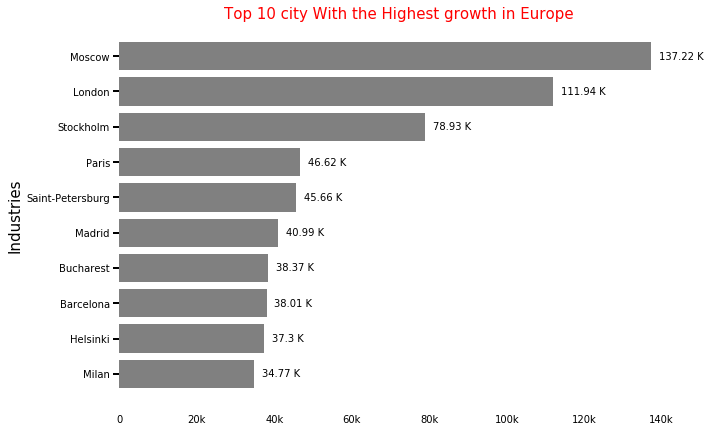

In [148]:
fig,ax = plt.subplots(figsize = (10,7))
ax.barh(ind_rev.index, ind_rev.values, color = 'gray')
ax = ind_rev.plot(kind='barh', color = 'gray',fontsize=13) this is an alternative way to plot
for key,spine in ax.spines.items():
    spine.set_visible(False)
ax.set_title('Top 10 {} With the Highest {} in Europe'.format(a,b),fontdict={'fontsize': 15,
                    'fontweight' :30},color='r')
ax.set_ylabel('Industries',fontdict= {'fontsize': 15})
ax.tick_params(bottom= False, top = False, left= True,right= False,length=6, width=2, colors='black',
               labelsize='medium') # this will remove all the tick
# Annotation
for i in ax.patches:
    ax.text(i.get_width()+ 0.2e4,i.get_y()+0.4, 
             str(round((i.get_width()/1e3),2))+ ' K', fontsize=10,verticalalignment='center',color = 'black')
ax.set_xticklabels(['0','20k','40k','60k','80k','100k','120k','140k'],fontdict = {'fontsize':10, 'weight':'medium',
                                                                                 'color':'black'} )
plt.show()

In [72]:
a = 'city'
b = 'growth'
c = 'Italy'
d  = 'revenue'

In [86]:
new_df = df[df['country']== c].groupby(a)[b].sum().sort_values(ascending = True).tail(10)
new_df2 = df[df['country']== c].groupby(a)[d].sum().sort_values(ascending = True).tail(10)

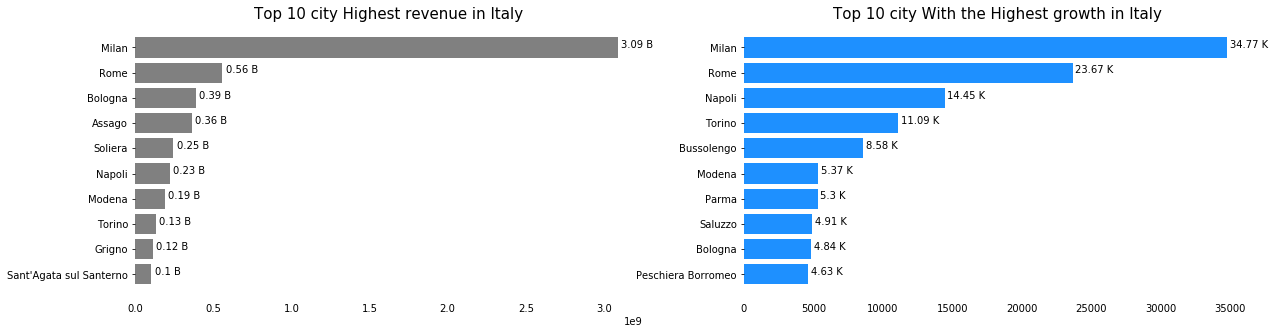

In [87]:
fig,(ax2,ax1) = plt.subplots(1,2,figsize = (20,5))
ax1.barh(new_df.index, new_df.values, color = 'dodgerblue')
#ax = ind_rev.plot(kind='barh', color = 'gray',fontsize=13)
for key,spine in ax1.spines.items():
    spine.set_visible(False)
ax1.set_title('Top 10 {} With the Highest {} in {}'.format(a,b,c),fontdict={'fontsize': 15,
                    'fontweight' :20,'verticalalignment': 'baseline'})
#ax1.set_ylabel('Industries',fontdict= {'fontsize': 15})
ax1.tick_params(bottom= False, top = False, left= True,right= False) # this will remove all the tick
# Annotation
for i in ax1.patches:
    ax1.text(i.get_width()+ 0.2e3,i.get_y()+0.5, 
             str(round((i.get_width()/1e3),2))+ ' K', fontsize=10,verticalalignment='center',color = 'black')

ax2.barh(new_df2.index, new_df2.values, color = 'gray')
#ax = ind_rev.plot(kind='barh', color = 'gray',fontsize=13)
for key,spine in ax2.spines.items():
    spine.set_visible(False)
ax2.set_title('Top 10 {} Highest {} in {}'.format(a,d,c),fontdict={'fontsize': 15,
                    'fontweight' :20,'verticalalignment': 'baseline'})
ax2.tick_params(bottom= False, top = False, left= True,right= False) # this will remove all the tick
# Annotation
for i in ax2.patches:
    ax2.text(i.get_width()+ 0.2e8,i.get_y()+0.5, 
             str(round((i.get_width()/1e9),2))+ ' B', fontsize=10,verticalalignment='center',color = 'black')
plt.show()

### For each Country, What is the number of cities,max,min and average growth?

In [120]:
round(df.groupby('country')['growth'].agg(['count','min','mean','max']),2).head()

,count,min,mean,max
country,,,,
Austria,26,59.51,317.25,2570.09
Belgium,131,53.82,608.75,3010.69
Bosnia and Herzegovina,21,76.70,308.96,1123.26
Bulgaria,85,61.45,344.15,2191.10
Canary Islands (Spain),8,182.80,674.92,1930.31


The result above may be a little confusing because some max growth will be equal to a city sum of growth. this will happen if the city has only one company operating it it. but if a city has more companies with a some of it growth higher than the max growth of the all every city, theefore the max growth and Sum of grwth per city will be different

In [119]:
# this will give the max growth in italy 
max_growth = df[(df.country=='Italy') & (df.growth > 8500)]
# but the city with the highest growth is Milan
city_max_growth = df[df['country']== 'Italy'].groupby('city')['growth'].sum().sort_values(ascending=False)[:1]
max_growth
city_max_growth

city
Milan    34774.4002
Name: growth, dtype: float64


In [149]:
df.head()

,city,growth,company,country,revenue,industry,yrs_on_list
0,London,14367.7003,Sumup Payments Limited,UK,55990000,IT Services,1
1,Helsinki,13600.7855,Restel Fast Food Oy,Finland,30278736,Travel & Hospitality,1
2,Nefteyugansk,11977.8447,New Teck Well Service Limited Liability Company,Russia,48502088,Energy,1
3,Majadahonda,11309.1782,Tamitrip SL,Spain,31651228,Travel & Hospitality,1
4,Madrid,9119.3100,MaxiMobility,Spain,64628654,Logistics & Transportation,1


In [162]:
type(ind_rev)

pandas.core.series.Series

In [165]:
ind_1 = pd.DataFrame({'City':ind_rev.index,'Growth':ind_rev.values})

In [166]:
ind_rev_2 = df.groupby(a)[d].sum().sort_values(ascending = True).tail(10)

In [167]:
ind_2 = pd.DataFrame({'City':ind_rev_2.index,'Revenue':ind_rev_2.values})

In [168]:
ind_2

,City,Revenue
0,Blackburn,2708934937
1,Bucharest,2787525389
2,Paris,2860915197
3,Malmesbury,2873350610
4,Cambridge,2890571945
5,Stockholm,3065264035
6,Milan,3090915356
7,Essen,5622211323
8,Moscow,7959269689
9,London,9907186297


In [169]:
ind_1

,City,Growth
0,Milan,34774.4002
1,Helsinki,37300.7500
2,Barcelona,38010.2881
3,Bucharest,38370.7189
4,Madrid,40991.2326
5,Saint-Petersburg,45662.5320
6,Paris,46617.2350
7,Stockholm,78929.4956
8,London,111936.0765
9,Moscow,137224.4026


In [175]:
pd.merge(ind_1,ind_2, how='left')#,left_index=false,right_index=True)

,City,Growth,Revenue
0,Milan,34774.4002,3.090915e+09
1,Helsinki,37300.7500,NaN
2,Barcelona,38010.2881,NaN
3,Bucharest,38370.7189,2.787525e+09
4,Madrid,40991.2326,NaN
5,Saint-Petersburg,45662.5320,NaN
6,Paris,46617.2350,2.860915e+09
7,Stockholm,78929.4956,3.065264e+09
8,London,111936.0765,9.907186e+09
9,Moscow,137224.4026,7.959270e+09


In [181]:
t = list(range(1,5))

In [182]:
t

[1, 2, 3, 4]